In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

import numpy as np
import pickle
import os
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset



from utilities.dataset import distribution_data_sampler
from utilities import constants, dataset

import scipy.stats as stats

from utilities.custom_layers import BaseEncoder, BaseDecoder, PreprocessingWrapper
from utilities import funcs

n_samples = 10000
# import scienceplots

# plt.style.use('science')

2023-04-20 10:42:41.986969: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [142]:
with open("only_inputs_results.pkl", "rb") as file:
    data = pickle.load(file)

for idx, inp in enumerate(data):
    cur_history = data[idx]['history']
    cur_history['loss'] = np.pad(np.array(cur_history['loss']), (0, 1000 - len(cur_history['loss'])), 'edge') 
    cur_history['loss'] = np.pad(np.array(cur_history['loss']), (0, 1000 - len(cur_history['loss'])), 'edge') 
    data[idx]['history'] = cur_history
    
df = pd.json_normalize(data, max_level=0)
df['duplication'] = df['duplication'].replace({1:False, 32:True})

#  Tables

In [4]:
total_number_transformations = df.shape[0]/(df['seed'].nunique() * df['x'].nunique())

results = df.groupby('params_id')[['score_noised', 'score_pure']].mean()
results = results.rename({'score_noised': 'loss_noised', 'score_pure':'loss_pure'}, axis=1)
results['x'] = df.groupby('params_id')[['x']].max()

In [5]:
best_noised = results.groupby('x')[['loss_noised']].min()
best_pure = results.groupby('x')[['loss_pure']].min()
results['relative_noised_ranking'] = results.apply(lambda x: (x['loss_noised']/best_noised.loc[x['x']])-1, axis=1)
results['relative_pure_ranking'] = results.apply(lambda x: (x['loss_pure']/best_pure.loc[x['x']])-1, axis=1)
total_results = results.groupby(results.index % total_number_transformations).mean()

transformation_description_short = df[df['params_id'] < total_number_transformations].groupby('params_id')[['transformation_name', 'transformation_params', 'keep_origin', 'duplication']].nth(0)
transformation_description_full = df.groupby('params_id')[['transformation_name', 'transformation_params', 'keep_origin', 'duplication']].nth(0)

total_results = transformation_description_short.join(total_results)

In [6]:
total_results.sort_values('relative_noised_ranking')

,transformation_name,transformation_params,keep_origin,duplication,loss_noised,loss_pure,relative_noised_ranking,relative_pure_ranking
params_id,,,,,,,,
48.0,k_bins_discr,"{'n_bins': 32, 'strategy': 'quantile'}",False,False,1.150050,0.111682,0.026599,1.499241
31.0,yeo_johnson,"{'method': 'yeo-johnson', 'standardize': True}",False,True,1.151224,0.108507,0.027359,0.852675
39.0,quantilation,"{'n_quantiles': 1000, 'output_distribution': '...",False,True,1.151900,0.110954,0.027945,0.698820
35.0,quantilation,"{'n_quantiles': 1000, 'output_distribution': '...",False,True,1.183583,0.141767,0.056313,2.286377
23.0,standardization,{},False,True,1.198762,0.151408,0.067658,1.374938
50.0,k_bins_discr,"{'n_bins': 32, 'strategy': 'kmeans'}",False,False,1.209657,0.155297,0.076723,1.584722
26.0,yeo_johnson,"{'method': 'yeo-johnson', 'standardize': False}",False,False,1.214637,0.172877,0.085205,3.129180
45.0,min_max_scaler,{},True,True,1.230665,0.190359,0.096966,2.243892
46.0,k_bins_discr,"{'n_bins': 32, 'strategy': 'uniform'}",False,False,1.249811,0.197475,0.111530,2.142956


In [7]:
total_results.sort_values('relative_pure_ranking')

,transformation_name,transformation_params,keep_origin,duplication,loss_noised,loss_pure,relative_noised_ranking,relative_pure_ranking
params_id,,,,,,,,
39.0,quantilation,"{'n_quantiles': 1000, 'output_distribution': '...",False,True,1.151900,0.110954,0.027945,0.698820
31.0,yeo_johnson,"{'method': 'yeo-johnson', 'standardize': True}",False,True,1.151224,0.108507,0.027359,0.852675
23.0,standardization,{},False,True,1.198762,0.151408,0.067658,1.374938
48.0,k_bins_discr,"{'n_bins': 32, 'strategy': 'quantile'}",False,False,1.150050,0.111682,0.026599,1.499241
50.0,k_bins_discr,"{'n_bins': 32, 'strategy': 'kmeans'}",False,False,1.209657,0.155297,0.076723,1.584722
46.0,k_bins_discr,"{'n_bins': 32, 'strategy': 'uniform'}",False,False,1.249811,0.197475,0.111530,2.142956
45.0,min_max_scaler,{},True,True,1.230665,0.190359,0.096966,2.243892
35.0,quantilation,"{'n_quantiles': 1000, 'output_distribution': '...",False,True,1.183583,0.141767,0.056313,2.286377
26.0,yeo_johnson,"{'method': 'yeo-johnson', 'standardize': False}",False,False,1.214637,0.172877,0.085205,3.129180


## Per distribution:

In [8]:
df_params_id = df.groupby('params_id')[['score_noised', 'score_pure']].mean()
results['x'] = df.groupby('params_id')[['x']].max()
splitted = results.reset_index().set_index(['x', 'params_id'])
splitted = transformation_description_full.join(splitted)

## Uniform

In [9]:
splitted.loc[['uniform']].sort_values('relative_noised_ranking')

transformation_name  \
x       params_id                       
uniform 41               quantilation   
        39               quantilation   
        36               quantilation   
        37               quantilation   
        33                yeo_johnson   
        26                yeo_johnson   
        40               quantilation   
        45             min_max_scaler   
        24            standardization   
        18                   identity   
        44             min_max_scaler   
        28                yeo_johnson   
        31                yeo_johnson   
        50               k_bins_discr   
        46               k_bins_discr   
        35               quantilation   
        23            standardization   
        25            standardization   
        51               k_bins_discr   
        47               k_bins_discr   
        20                   identity   
        48               k_bins_discr   
        49               k_bins_discr   
        43             min_max_scaler   
        32                yeo_johnson   
        21                   identity   
        29                yeo_johnson   
        13         numerical_encoding   
        17         numerical_encoding   
        42             min_max_scaler   
        27                yeo_johnson   
        5          numerical_encoding   
        12         numerical_encoding   
        19                   identity   
        9          numerical_encoding   
        16         numerical_encoding   
        3          numerical_encoding   
        8          numerical_encoding   
        15         numerical_encoding   
        7          numerical_encoding   
        11         numerical_encoding   
        2          numerical_encoding   
        4          numerical_encoding   
        1          numerical_encoding   
        10         numerical_encoding   
        14         numerical_encoding   
        6          numerical_encoding   
        0          numerical_encoding   
        22            standardization   
        38               quantilation   
        34               quantilation   
        30                yeo_johnson   

                                               transformation_params  \
x       params_id                                                      
uniform 41         {'n_quantiles': 1000, 'output_distribution': '...   
        39         {'n_quantiles': 1000, 'output_distribution': '...   
        36         {'n_quantiles': 1000, 'output_distribution': '...   
        37         {'n_quantiles': 1000, 'output_distribution': '...   
        33            {'method': 'yeo-johnson', 'standardize': True}   
        26           {'method': 'yeo-johnson', 'standardize': False}   
        40         {'n_quantiles': 1000, 'output_distribution': '...   
        45                                                        {}   
        24                                                        {}   
        18                                                        {}   
        44                                                        {}   
        28           {'method': 'yeo-johnson', 'standardize': False}   
        31            {'method': 'yeo-johnson', 'standardize': True}   
        50                      {'n_bins': 32, 'strategy': 'kmeans'}   
        46                     {'n_bins': 32, 'strategy': 'uniform'}   
        35         {'n_quantiles': 1000, 'output_distribution': '...   
        23                                                        {}   
        25                                                        {}   
        51                      {'n_bins': 32, 'strategy': 'kmeans'}   
        47                     {'n_bins': 32, 'strategy': 'uniform'}   
        20                                                        {}   
        48                    {'n_bins': 32, 'strategy': 'quantile'}   
        49                    {'n_bins': 32, 'strategy': 'quantile'}   
   

In [10]:
splitted.loc[['uniform']].sort_values('relative_pure_ranking')

transformation_name  \
x       params_id                       
uniform 36               quantilation   
        39               quantilation   
        33                yeo_johnson   
        41               quantilation   
        37               quantilation   
        24            standardization   
        18                   identity   
        45             min_max_scaler   
        31                yeo_johnson   
        40               quantilation   
        44             min_max_scaler   
        26                yeo_johnson   
        28                yeo_johnson   
        23            standardization   
        25            standardization   
        20                   identity   
        50               k_bins_discr   
        49               k_bins_discr   
        46               k_bins_discr   
        47               k_bins_discr   
        48               k_bins_discr   
        51               k_bins_discr   
        35               quantilation   
        32                yeo_johnson   
        43             min_max_scaler   
        21                   identity   
        29                yeo_johnson   
        42             min_max_scaler   
        27                yeo_johnson   
        17         numerical_encoding   
        13         numerical_encoding   
        12         numerical_encoding   
        5          numerical_encoding   
        19                   identity   
        16         numerical_encoding   
        9          numerical_encoding   
        3          numerical_encoding   
        15         numerical_encoding   
        8          numerical_encoding   
        7          numerical_encoding   
        2          numerical_encoding   
        4          numerical_encoding   
        11         numerical_encoding   
        1          numerical_encoding   
        10         numerical_encoding   
        14         numerical_encoding   
        6          numerical_encoding   
        0          numerical_encoding   
        22            standardization   
        38               quantilation   
        34               quantilation   
        30                yeo_johnson   

                                               transformation_params  \
x       params_id                                                      
uniform 36         {'n_quantiles': 1000, 'output_distribution': '...   
        39         {'n_quantiles': 1000, 'output_distribution': '...   
        33            {'method': 'yeo-johnson', 'standardize': True}   
        41         {'n_quantiles': 1000, 'output_distribution': '...   
        37         {'n_quantiles': 1000, 'output_distribution': '...   
        24                                                        {}   
        18                                                        {}   
        45                                                        {}   
        31            {'method': 'yeo-johnson', 'standardize': True}   
        40         {'n_quantiles': 1000, 'output_distribution': '...   
        44                                                        {}   
        26           {'method': 'yeo-johnson', 'standardize': False}   
        28           {'method': 'yeo-johnson', 'standardize': False}   
        23                                                        {}   
        25                                                        {}   
        20                                                        {}   
        50                      {'n_bins': 32, 'strategy': 'kmeans'}   
        49                    {'n_bins': 32, 'strategy': 'quantile'}   
        46                     {'n_bins': 32, 'strategy': 'uniform'}   
        47                     {'n_bins': 32, 'strategy': 'uniform'}   
        48                    {'n_bins': 32, 'strategy': 'quantile'}   
        51                      {'n_bins': 32, 'strategy': 'kmeans'}   
        35         {'n_quantiles': 1000, 'output_distribution': '...   
   

## Normal

In [11]:
splitted.loc[['norm']].sort_values('relative_noised_ranking')

transformation_name  \
x    params_id                       
norm 197              quantilation   
     181           standardization   
     178           standardization   
     189               yeo_johnson   
     194              quantilation   
     205              k_bins_discr   
     187               yeo_johnson   
     186               yeo_johnson   
     204              k_bins_discr   
     195              quantilation   
     207              k_bins_discr   
     180           standardization   
     206              k_bins_discr   
     179           standardization   
     203              k_bins_discr   
     202              k_bins_discr   
     196              quantilation   
     191              quantilation   
     193              quantilation   
     188               yeo_johnson   
     190              quantilation   
     165        numerical_encoding   
     201            min_max_scaler   
     161        numerical_encoding   
     157        numerical_encoding   
     173        numerical_encoding   
     159        numerical_encoding   
     192              quantilation   
     169        numerical_encoding   
     174                  identity   
     160        numerical_encoding   
     163        numerical_encoding   
     168        numerical_encoding   
     172        numerical_encoding   
     164        numerical_encoding   
     176                  identity   
     200            min_max_scaler   
     158        numerical_encoding   
     182               yeo_johnson   
     184               yeo_johnson   
     162        numerical_encoding   
     171        numerical_encoding   
     167        numerical_encoding   
     170        numerical_encoding   
     156        numerical_encoding   
     185               yeo_johnson   
     177                  identity   
     175                  identity   
     166        numerical_encoding   
     183               yeo_johnson   
     198            min_max_scaler   
     199            min_max_scaler   

                                            transformation_params  \
x    params_id                                                      
norm 197        {'n_quantiles': 1000, 'output_distribution': '...   
     181                                                       {}   
     178                                                       {}   
     189           {'method': 'yeo-johnson', 'standardize': True}   
     194        {'n_quantiles': 1000, 'output_distribution': '...   
     205                   {'n_bins': 32, 'strategy': 'quantile'}   
     187           {'method': 'yeo-johnson', 'standardize': True}   
     186           {'method': 'yeo-johnson', 'standardize': True}   
     204                   {'n_bins': 32, 'strategy': 'quantile'}   
     195        {'n_quantiles': 1000, 'output_distribution': '...   
     207                     {'n_bins': 32, 'strategy': 'kmeans'}   
     180                                                       {}   
     206                     {'n_bins': 32, 'strategy': 'kmeans'}   
     179                                                       {}   
     203                    {'n_bins': 32, 'strategy': 'uniform'}   
     202                    {'n_bins': 32, 'strategy': 'uniform'}   
     196        {'n_quantiles': 1000, 'output_distribution': '...   
     191        {'n_quantiles': 1000, 'output_distribution': '...   
     193        {'n_quantiles': 1000, 'output_distribution': '...   
     188           {'method': 'yeo-johnson', 'standardize': True}   
     190        {'n_quantiles': 1000, 'output_distribution': '...   
     165                                {'base': 4, 'norm': True}   
     201                                                       {}   
     161                                {'base': 3, 'norm': True}   
     157                               {'base': 2, 'norm': False}   
     173                               {'base': 16, 'norm': True}   
     159                      

In [12]:
splitted.loc[['norm']].sort_values('relative_pure_ranking')

transformation_name  \
x    params_id                       
norm 197              quantilation   
     181           standardization   
     189               yeo_johnson   
     178           standardization   
     194              quantilation   
     187               yeo_johnson   
     205              k_bins_discr   
     186               yeo_johnson   
     180           standardization   
     207              k_bins_discr   
     195              quantilation   
     206              k_bins_discr   
     204              k_bins_discr   
     203              k_bins_discr   
     179           standardization   
     202              k_bins_discr   
     196              quantilation   
     191              quantilation   
     188               yeo_johnson   
     193              quantilation   
     190              quantilation   
     201            min_max_scaler   
     161        numerical_encoding   
     159        numerical_encoding   
     173        numerical_encoding   
     165        numerical_encoding   
     192              quantilation   
     157        numerical_encoding   
     174                  identity   
     169        numerical_encoding   
     172        numerical_encoding   
     168        numerical_encoding   
     163        numerical_encoding   
     200            min_max_scaler   
     160        numerical_encoding   
     176                  identity   
     164        numerical_encoding   
     184               yeo_johnson   
     182               yeo_johnson   
     158        numerical_encoding   
     171        numerical_encoding   
     162        numerical_encoding   
     167        numerical_encoding   
     185               yeo_johnson   
     170        numerical_encoding   
     177                  identity   
     156        numerical_encoding   
     175                  identity   
     166        numerical_encoding   
     183               yeo_johnson   
     198            min_max_scaler   
     199            min_max_scaler   

                                            transformation_params  \
x    params_id                                                      
norm 197        {'n_quantiles': 1000, 'output_distribution': '...   
     181                                                       {}   
     189           {'method': 'yeo-johnson', 'standardize': True}   
     178                                                       {}   
     194        {'n_quantiles': 1000, 'output_distribution': '...   
     187           {'method': 'yeo-johnson', 'standardize': True}   
     205                   {'n_bins': 32, 'strategy': 'quantile'}   
     186           {'method': 'yeo-johnson', 'standardize': True}   
     180                                                       {}   
     207                     {'n_bins': 32, 'strategy': 'kmeans'}   
     195        {'n_quantiles': 1000, 'output_distribution': '...   
     206                     {'n_bins': 32, 'strategy': 'kmeans'}   
     204                   {'n_bins': 32, 'strategy': 'quantile'}   
     203                    {'n_bins': 32, 'strategy': 'uniform'}   
     179                                                       {}   
     202                    {'n_bins': 32, 'strategy': 'uniform'}   
     196        {'n_quantiles': 1000, 'output_distribution': '...   
     191        {'n_quantiles': 1000, 'output_distribution': '...   
     188           {'method': 'yeo-johnson', 'standardize': True}   
     193        {'n_quantiles': 1000, 'output_distribution': '...   
     190        {'n_quantiles': 1000, 'output_distribution': '...   
     201                                                       {}   
     161                                {'base': 3, 'norm': True}   
     159                               {'base': 3, 'norm': False}   
     173                               {'base': 16, 'norm': True}   
     165                                {'base': 4, 'norm': True}   
     192        {'n_quantiles'

## Lognormal

In [13]:
splitted.loc[['lognorm']].sort_values('relative_noised_ranking')

transformation_name  \
x       params_id                       
lognorm 82                yeo_johnson   
        86               quantilation   
        91               quantilation   
        83                yeo_johnson   
        100              k_bins_discr   
        78                yeo_johnson   
        87               quantilation   
        79                yeo_johnson   
        90               quantilation   
        68         numerical_encoding   
        52         numerical_encoding   
        66         numerical_encoding   
        60         numerical_encoding   
        64         numerical_encoding   
        56         numerical_encoding   
        58         numerical_encoding   
        54         numerical_encoding   
        62         numerical_encoding   
        97             min_max_scaler   
        95             min_max_scaler   
        75            standardization   
        74            standardization   
        102              k_bins_discr   
        94             min_max_scaler   
        98               k_bins_discr   
        61         numerical_encoding   
        81                yeo_johnson   
        80                yeo_johnson   
        70                   identity   
        76            standardization   
        101              k_bins_discr   
        63         numerical_encoding   
        65         numerical_encoding   
        99               k_bins_discr   
        59         numerical_encoding   
        88               quantilation   
        77            standardization   
        67         numerical_encoding   
        92               quantilation   
        53         numerical_encoding   
        85                yeo_johnson   
        93               quantilation   
        103              k_bins_discr   
        84                yeo_johnson   
        73                   identity   
        55         numerical_encoding   
        57         numerical_encoding   
        69         numerical_encoding   
        89               quantilation   
        96             min_max_scaler   
        71                   identity   
        72                   identity   

                                               transformation_params  \
x       params_id                                                      
lognorm 82            {'method': 'yeo-johnson', 'standardize': True}   
        86         {'n_quantiles': 1000, 'output_distribution': '...   
        91         {'n_quantiles': 1000, 'output_distribution': '...   
        83            {'method': 'yeo-johnson', 'standardize': True}   
        100                   {'n_bins': 32, 'strategy': 'quantile'}   
        78           {'method': 'yeo-johnson', 'standardize': False}   
        87         {'n_quantiles': 1000, 'output_distribution': '...   
        79           {'method': 'yeo-johnson', 'standardize': False}   
        90         {'n_quantiles': 1000, 'output_distribution': '...   
        68                                {'base': 16, 'norm': True}   
        52                                {'base': 2, 'norm': False}   
        66                               {'base': 16, 'norm': False}   
        60                                 {'base': 4, 'norm': True}   
        64                                 {'base': 8, 'norm': True}   
        56                                 {'base': 3, 'norm': True}   
        58                                {'base': 4, 'norm': False}   
        54                                {'base': 3, 'norm': False}   
        62                                {'base': 8, 'norm': False}   
        97                                                        {}   
        95                                                        {}   
        75                                                        {}   
        74                                                        {}   
        102                     {'n_bins': 32, 'strategy': 'kmeans'}   
   

In [14]:
splitted.loc[['lognorm']].sort_values('relative_pure_ranking')

transformation_name  \
x       params_id                       
lognorm 82                yeo_johnson   
        86               quantilation   
        91               quantilation   
        83                yeo_johnson   
        100              k_bins_discr   
        78                yeo_johnson   
        87               quantilation   
        79                yeo_johnson   
        68         numerical_encoding   
        90               quantilation   
        52         numerical_encoding   
        60         numerical_encoding   
        66         numerical_encoding   
        56         numerical_encoding   
        64         numerical_encoding   
        58         numerical_encoding   
        62         numerical_encoding   
        97             min_max_scaler   
        54         numerical_encoding   
        95             min_max_scaler   
        75            standardization   
        74            standardization   
        102              k_bins_discr   
        94             min_max_scaler   
        98               k_bins_discr   
        61         numerical_encoding   
        81                yeo_johnson   
        80                yeo_johnson   
        70                   identity   
        76            standardization   
        101              k_bins_discr   
        63         numerical_encoding   
        65         numerical_encoding   
        99               k_bins_discr   
        59         numerical_encoding   
        88               quantilation   
        77            standardization   
        67         numerical_encoding   
        92               quantilation   
        53         numerical_encoding   
        85                yeo_johnson   
        93               quantilation   
        103              k_bins_discr   
        84                yeo_johnson   
        73                   identity   
        55         numerical_encoding   
        57         numerical_encoding   
        69         numerical_encoding   
        89               quantilation   
        96             min_max_scaler   
        71                   identity   
        72                   identity   

                                               transformation_params  \
x       params_id                                                      
lognorm 82            {'method': 'yeo-johnson', 'standardize': True}   
        86         {'n_quantiles': 1000, 'output_distribution': '...   
        91         {'n_quantiles': 1000, 'output_distribution': '...   
        83            {'method': 'yeo-johnson', 'standardize': True}   
        100                   {'n_bins': 32, 'strategy': 'quantile'}   
        78           {'method': 'yeo-johnson', 'standardize': False}   
        87         {'n_quantiles': 1000, 'output_distribution': '...   
        79           {'method': 'yeo-johnson', 'standardize': False}   
        68                                {'base': 16, 'norm': True}   
        90         {'n_quantiles': 1000, 'output_distribution': '...   
        52                                {'base': 2, 'norm': False}   
        60                                 {'base': 4, 'norm': True}   
        66                               {'base': 16, 'norm': False}   
        56                                 {'base': 3, 'norm': True}   
        64                                 {'base': 8, 'norm': True}   
        58                                {'base': 4, 'norm': False}   
        62                                {'base': 8, 'norm': False}   
        97                                                        {}   
        54                                {'base': 3, 'norm': False}   
        95                                                        {}   
        75                                                        {}   
        74                                                        {}   
        102                     {'n_bins': 32, 'strategy': 'kmeans'}   
   

## Loguniform

In [15]:
splitted.loc[['loguniform']].sort_values('relative_noised_ranking')

transformation_name  \
x          params_id                       
loguniform 155              k_bins_discr   
           151              k_bins_discr   
           154              k_bins_discr   
           127           standardization   
           153              k_bins_discr   
           152              k_bins_discr   
           129           standardization   
           135               yeo_johnson   
           147            min_max_scaler   
           143              quantilation   
           141              quantilation   
           146            min_max_scaler   
           133               yeo_johnson   
           134               yeo_johnson   
           113        numerical_encoding   
           145              quantilation   
           138              quantilation   
           109        numerical_encoding   
           137               yeo_johnson   
           139              quantilation   
           107        numerical_encoding   
           122                  identity   
           130               yeo_johnson   
           124                  identity   
           121        numerical_encoding   
           128           standardization   
           142              quantilation   
           150              k_bins_discr   
           117        numerical_encoding   
           131               yeo_johnson   
           144              quantilation   
           148            min_max_scaler   
           111        numerical_encoding   
           136               yeo_johnson   
           123                  identity   
           140              quantilation   
           120        numerical_encoding   
           105        numerical_encoding   
           119        numerical_encoding   
           149            min_max_scaler   
           112        numerical_encoding   
           132               yeo_johnson   
           115        numerical_encoding   
           126           standardization   
           110        numerical_encoding   
           118        numerical_encoding   
           116        numerical_encoding   
           106        numerical_encoding   
           108        numerical_encoding   
           114        numerical_encoding   
           125                  identity   
           104        numerical_encoding   

                                                  transformation_params  \
x          params_id                                                      
loguniform 155                     {'n_bins': 32, 'strategy': 'kmeans'}   
           151                    {'n_bins': 32, 'strategy': 'uniform'}   
           154                     {'n_bins': 32, 'strategy': 'kmeans'}   
           127                                                       {}   
           153                   {'n_bins': 32, 'strategy': 'quantile'}   
           152                   {'n_bins': 32, 'strategy': 'quantile'}   
           129                                                       {}   
           135           {'method': 'yeo-johnson', 'standardize': True}   
           147                                                       {}   
           143        {'n_quantiles': 1000, 'output_distribution': '...   
           141        {'n_quantiles': 1000, 'output_distribution': '...   
           146                                                       {}   
           133          {'method': 'yeo-johnson', 'standardize': False}   
           134           {'method': 'yeo-johnson', 'standardize': True}   
           113                                {'base': 4, 'norm': True}   
           145        {'n_quantiles': 1000, 'output_distribution': '...   
           138        {'n_quantiles': 1000, 'output_distribution': '...   
           109                                {'base': 3, 'norm': True}   
           137           {'method': 'yeo-johnson', 'standardize': True}   
           139        {'n_quantiles': 1000, 'output_distribution': '.

In [16]:
splitted.loc[['loguniform']].sort_values('relative_pure_ranking')

transformation_name  \
x          params_id                       
loguniform 155              k_bins_discr   
           151              k_bins_discr   
           154              k_bins_discr   
           127           standardization   
           153              k_bins_discr   
           152              k_bins_discr   
           135               yeo_johnson   
           129           standardization   
           147            min_max_scaler   
           143              quantilation   
           146            min_max_scaler   
           141              quantilation   
           134               yeo_johnson   
           133               yeo_johnson   
           113        numerical_encoding   
           145              quantilation   
           109        numerical_encoding   
           138              quantilation   
           137               yeo_johnson   
           150              k_bins_discr   
           107        numerical_encoding   
           139              quantilation   
           122                  identity   
           121        numerical_encoding   
           130               yeo_johnson   
           124                  identity   
           128           standardization   
           117        numerical_encoding   
           142              quantilation   
           144              quantilation   
           131               yeo_johnson   
           111        numerical_encoding   
           148            min_max_scaler   
           105        numerical_encoding   
           136               yeo_johnson   
           119        numerical_encoding   
           123                  identity   
           140              quantilation   
           115        numerical_encoding   
           120        numerical_encoding   
           149            min_max_scaler   
           132               yeo_johnson   
           112        numerical_encoding   
           126           standardization   
           116        numerical_encoding   
           110        numerical_encoding   
           106        numerical_encoding   
           118        numerical_encoding   
           108        numerical_encoding   
           104        numerical_encoding   
           114        numerical_encoding   
           125                  identity   

                                                  transformation_params  \
x          params_id                                                      
loguniform 155                     {'n_bins': 32, 'strategy': 'kmeans'}   
           151                    {'n_bins': 32, 'strategy': 'uniform'}   
           154                     {'n_bins': 32, 'strategy': 'kmeans'}   
           127                                                       {}   
           153                   {'n_bins': 32, 'strategy': 'quantile'}   
           152                   {'n_bins': 32, 'strategy': 'quantile'}   
           135           {'method': 'yeo-johnson', 'standardize': True}   
           129                                                       {}   
           147                                                       {}   
           143        {'n_quantiles': 1000, 'output_distribution': '...   
           146                                                       {}   
           141        {'n_quantiles': 1000, 'output_distribution': '...   
           134           {'method': 'yeo-johnson', 'standardize': True}   
           133          {'method': 'yeo-johnson', 'standardize': False}   
           113                                {'base': 4, 'norm': True}   
           145        {'n_quantiles': 1000, 'output_distribution': '...   
           109                                {'base': 3, 'norm': True}   
           138        {'n_quantiles': 1000, 'output_distribution': '...   
           137           {'method': 'yeo-johnson', 'standardize': True}   
           150                    {'n_bins': 32, 'strategy': 'uniform

# Plots

In [9]:
xy_arrays = df.groupby(['x', 'y']).size().index.to_list()
base_array = [2, 3, 4, 8, 16]

font_size_sublabels = 15
dist_names = {'norm': f'N({constants.NORM_LOC}, {constants.NORM_SCALE})',
              'lognorm': f'LN({constants.EXPON_LOC}, {constants.EXPON_SCALE}, {constants.EXPON_S})'}

y_funcs = {
    'exp' : f'y = exp(X) + N(0, 1)',
    'lin' :  f'y = lin(X) + N(0, 1)'
}
params = np.array(['norm', 'keep_origin'])
slice_from = 0
func = np.log

In [18]:
for x, y in xy_arrays:
    for base in base_array:
        if x == 'norm' and y =='norm':
            continuea
        mask = (df['x']==x)&(df['y']==y)
        ne = df[mask&(df['transformation_params.base']==base)]
        intact = np.array(df[mask&(df['transformation_name']=="intact")]["history"].to_list())
        standardization = np.array(df[mask&(df['transformation_name']=="standardization")&(df['transformation_params.keep_origin']==False)]["history"].to_list())
        baselines = {'intact':intact, 'standardization':standardization} 


        linewidth = 0.9
        fig, ax = plt.subplots(2, 2, figsize=(20,10), sharex=True, sharey=True)
        for idy, param in enumerate(['keep_origin', 'norm']):
            left_param = params[np.where(params!=param)[0][0]]
            for idx, param_bool in enumerate([False, True]):
                for (loss_name, loss), c in zip(baselines.items(), ['tab:purple', 'tab:pink']):
                    ax[idy, idx].plot(func(loss.mean(axis=0))[slice_from:], label=loss_name, c=c, linewidth=linewidth, alpha=0.6)
                loss_wo = func(np.array(ne[(ne[f'transformation_params.{param}']==param_bool)&(ne[f'transformation_params.{left_param}']==False)]['history'].to_list()).mean(axis=0)[slice_from:])
                loss_w = func(np.array(ne[(ne[f'transformation_params.{param}']==param_bool)&(ne[f'transformation_params.{left_param}']==True)]['history'].to_list()).mean(axis=0)[slice_from:])

                ax[idy, idx].plot(loss_wo, '-', c='tab:orange', linewidth=linewidth-0.2, label=f'{left_param} False')
                ax[idy, idx].plot(loss_w, '-', c='tab:red', linewidth=linewidth-0.2, label=f'{left_param} True')

                xticks = list(range(0, len(loss_wo)+1, 100))
                ax[idy, idx].set_xticks(xticks, labels=list(range(slice_from, len(loss_wo)+slice_from+1, 100)))

        plt.suptitle(f'X ~ {dist_names[x]}\n{y_funcs[y]}', size=25)
        ax[0, 0].set_ylabel(f"keep_origin", size=font_size_sublabels)
        ax[1, 0].set_ylabel(f"norm", size=font_size_sublabels)
        ax[0, 0].xaxis.set_label_position('top')
        ax[0, 1].xaxis.set_label_position('top')

        ax[0, 0].set_xlabel(f"False", size=font_size_sublabels)
        ax[0, 1].set_xlabel(f"True", size=font_size_sublabels)
        ax[0, 1].legend(prop={'size': 15}, bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
        ax[1, 1].legend(prop={'size': 15}, bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
        
        fig.add_artist(lines.Line2D([0.07, 1.1], [0.5, 0.5], linewidth=5, alpha=0.6, c='lightgrey', linestyle='--'))
        fig.text(0.5, 0.04, 'Epochs', ha='center', size=20)
        fig.text(0.04, 0.5, f"{func.__name__} MSE", va='center', rotation='vertical', size=20)
        fig.text(1, 0.01, '*Curves are averaged over 5 experiments', alpha=0.3, size=15, ha='right')
        fig.text(0.01, 0.01, f'Base {base}', alpha=0.3, size=25, ha='left')

        path = f"plots/x_{x}_y_{y}"
        if not os.path.exists(path):
            os.mkdir(path)
        plt.savefig(f'{path}/base_{base}.png')
        plt.close()

In [13]:
bools = [False, True]
linewidth = 2
baseline_step = 1


for x, y in xy_arrays:
    mask = (df['x']==x)&(df['y']==y)
    ne = df[mask&(df['transformation_params.base']!=10)]
    intact = np.array(df[mask&(df['transformation_name']=="intact")]["history"].to_list())
    standardization = np.array(df[mask&(df['transformation_name']=="standardization")]["history"].to_list())
    
    baselines = {'intact':intact, 'standardization':standardization} 

    for norm in bools:
        for keep_origin in bools:
            fig, ax = plt.subplots(1, 1, figsize=(16,10))

            # Baseline plotting
            for (loss_name, loss), c, m in zip(baselines.items(), ['0.6', '0.3'], ['-', '--']):
                ax.plot(np.arange(constants.EPOCHS)[slice_from::baseline_step], func(loss.mean(axis=0)[slice_from::baseline_step]), m, c=c, label=loss_name, linewidth=linewidth, zorder=10)
            # Different bases
            color = iter(plt.cm.summer(np.linspace(0, 1, len(base_array))))

            for base in base_array:
                c = next(color)
                loss_0 = func(np.array(ne[(ne['transformation_params.base']==base)&(ne['transformation_params.norm']==norm)&(ne['transformation_params.keep_origin']==keep_origin)]['history'].to_list()).mean(axis=0)[slice_from:])
                ax.plot(loss_0, '-', label=f'base {base}',c=c, linewidth=linewidth-0.2, alpha=0.8)
                xticks = list(range(0, len(loss_0)+1, 100))
                ax.set_xticks(xticks, labels=list(range(slice_from, len(loss_0)+slice_from+1, 100)))

            plt.suptitle(f'Base comparison', size=25)
            fig.text(0.01, 0.01, f'X ~ {dist_names[x]}\n{y_funcs[y]}', alpha=0.4, size=25)               
            fig.text(1, 0.01, '*Curves are averaged over 5 experiments', alpha=0.3, size=15, ha='right')

            fig.text(0.6, 0.7, f'normalization {norm}\nkeep_origin   {keep_origin}\n', alpha=0.4, size=25, ha='right')               
            fig.legend(loc='upper right', prop={'size': 15})
            ax.set_ylabel(f"{func.__name__} MSE", size=20)
            ax.set_xlabel(f"Epochs", size=20)
            path = f"plots/x_{x}_y_{y}/base_comparison"
            if not os.path.exists(path):
                os.mkdir(path)
            plt.savefig(f'{path}/{norm}_{keep_origin}.png')
            plt.close()

# Distributions

In [17]:
df = dataset.load_toy_dataset(path='./toy_dataset/sin_y/*')
total_transformations = sum([len(v['params']) for k, v in constants.TRANSFORMATIONS.items()])
total_distributions = len(df)

In [13]:
loader = constants.TRANSFORMATIONS['numerical_encoding']

In [9]:
layer = loader['preproc_layer']
example_param = loader['params'][0]

In [15]:
tranformation_layer = PreprocessingWrapper(layer(**example_param), 

In [21]:
df['norm']['x']

array([[-12.32724922],
       [ -8.08969677],
       [ -8.0383273 ],
       ...,
       [ 26.94556196],
       [ 27.71270162],
       [ 28.201158  ]])

In [20]:
tranformation_layer(df['norm']['x'])

2023-04-19 17:32:07.510054: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-19 17:32:07.510386: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-19 17:32:07.510398: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-19 17:32:07.510415: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nearpit): /proc/driver/nvidia/version does not exist
2023-04-19 17:32:07.511301: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlo

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

2023-04-19 13:42:02.361708: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-19 13:42:02.361998: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-19 13:42:02.362006: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-19 13:42:02.362019: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nearpit): /proc/driver/nvidia/version does not exist
2023-04-19 13:42:02.362158: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlo

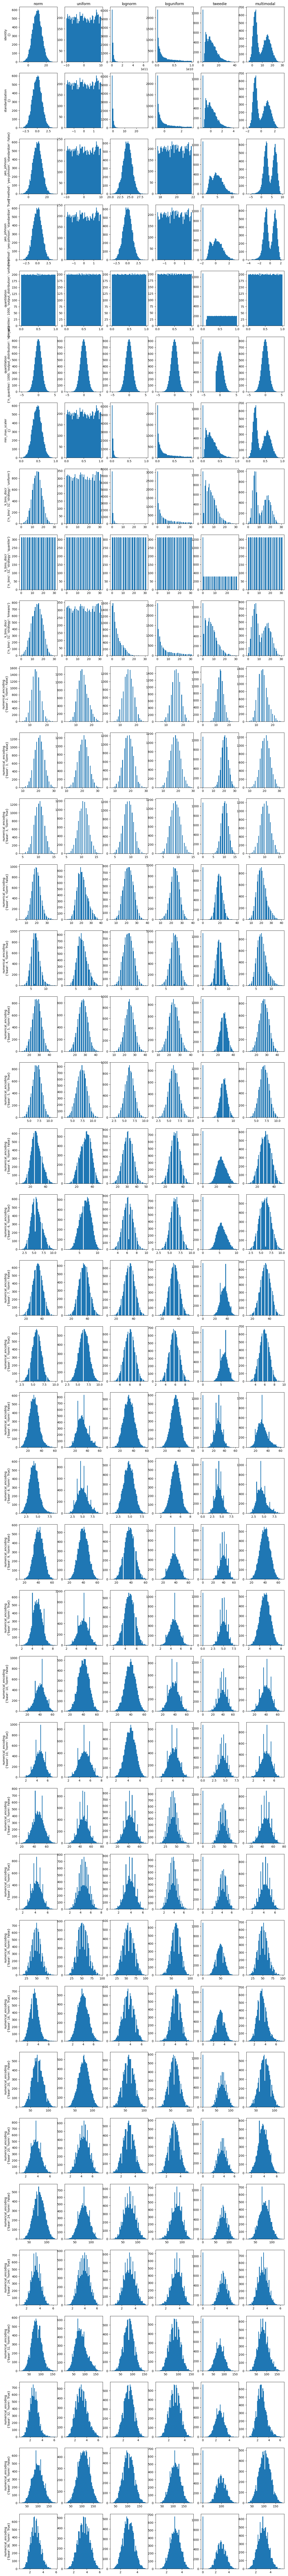

In [4]:
bins = 50

fig, ax = plt.subplots(total_transformations, total_distributions, figsize=(16, total_transformations*4))
for idy, (dist_name, dist_loader) in enumerate(df.items()):
    idx = 0
    if idx == 0:
        ax[idx, idy].set_title(dist_name)
    x = dist_loader['x']
    for transformation_name, transformation_loader in constants.TRANSFORMATIONS.items():
        for param in transformation_loader['params']:
            if idy == 0:
                ax[idx, idy].set_ylabel(f'{transformation_name}\n{param}')
            transformation_layer = PreprocessingWrapper(transformation_loader['preproc_layer'](**param), keep_origin=False, duplicate=1)
            transformed_x = transformation_layer(x)
            if transformation_name == 'numerical_encoding':
                transformed_x = np.sum(transformed_x, axis=-1)
            elif transformation_name == 'k_bins_discr':
                transformed_x = np.argmax(transformed_x, axis=-1)
            else:
                transformed_x = np.squeeze(transformed_x, axis=-1)
            ax[idx, idy].hist(transformed_x, bins=bins)
            idx += 1